In [49]:
# ----------- LIBRARY ---------------
"""
Library yang digunakan dalam kode ini adalah :
- pandas
- openpyxl

"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [43]:
# CLEANING UMUR > 100

In [44]:
df = pd.read_excel(r"Data\13222114.xlsx")
ukuran = df.shape
print(f"DataFrame memiliki {ukuran[0]} baris dan {ukuran[1]} kolom.")

DataFrame memiliki 282 baris dan 150 kolom.


In [45]:
df.drop(df[df['Usia'] > 100].index, inplace=True)
ukuran = df.shape
print(f"DataFrame setelah cleansing umur memiliki {ukuran[0]} baris dan {ukuran[1]} kolom.")

DataFrame setelah cleansing umur memiliki 279 baris dan 150 kolom.


In [46]:
# NOMER 1

ukuran = df.shape
print("1.a Berapa dimensi dataset?")
print(f"DataFrame memiliki {ukuran[0]} baris dan {ukuran[1]} kolom.")


1.a Berapa dimensi dataset?
DataFrame memiliki 279 baris dan 150 kolom.


In [47]:
print("1.b Jumlah missing value per kolom?")
for col in df.columns:
    missing = df[col].isnull().sum()
    print(f"Jumlah missing value pada kolom '{col}': {missing}")

1.b Jumlah missing value per kolom?
Jumlah missing value pada kolom 'Jenis Kelamin': 0
Jumlah missing value pada kolom 'Usia': 0
Jumlah missing value pada kolom 'Pendidikan Terakhir': 0
Jumlah missing value pada kolom 'Pekerjaan': 0
Jumlah missing value pada kolom 'Penghasilan per Bulan': 0
Jumlah missing value pada kolom 'Domisili': 0
Jumlah missing value pada kolom 'Durasi Penggunaan Internet per Hari (dalam Jam)': 84
Jumlah missing value pada kolom 'Aktivitas Online Meningkat': 0
Jumlah missing value pada kolom 'Aktivitas yang Meningkat dalam 3 Bulan Terakhir': 95
Jumlah missing value pada kolom 'layanan_aktif_1': 43
Jumlah missing value pada kolom 'layanan_aktif_2': 133
Jumlah missing value pada kolom 'layanan_aktif_3': 256
Jumlah missing value pada kolom 'layanan_aktif_4': 224
Jumlah missing value pada kolom 'layanan_aktif_5': 264
Jumlah missing value pada kolom 'layanan_aktif_6': 268
Jumlah missing value pada kolom 'bank_1': 214
Jumlah missing value pada kolom 'bank_2': 212
Jumla

In [48]:
for col in df.columns:
    missing = df[col].isnull().sum()
    print(f"Jumlah missing value pada kolom '{col}': {missing}")


Jumlah missing value pada kolom 'Jenis Kelamin': 0
Jumlah missing value pada kolom 'Usia': 0
Jumlah missing value pada kolom 'Pendidikan Terakhir': 0
Jumlah missing value pada kolom 'Pekerjaan': 0
Jumlah missing value pada kolom 'Penghasilan per Bulan': 0
Jumlah missing value pada kolom 'Domisili': 0
Jumlah missing value pada kolom 'Durasi Penggunaan Internet per Hari (dalam Jam)': 84
Jumlah missing value pada kolom 'Aktivitas Online Meningkat': 0
Jumlah missing value pada kolom 'Aktivitas yang Meningkat dalam 3 Bulan Terakhir': 95
Jumlah missing value pada kolom 'layanan_aktif_1': 43
Jumlah missing value pada kolom 'layanan_aktif_2': 133
Jumlah missing value pada kolom 'layanan_aktif_3': 256
Jumlah missing value pada kolom 'layanan_aktif_4': 224
Jumlah missing value pada kolom 'layanan_aktif_5': 264
Jumlah missing value pada kolom 'layanan_aktif_6': 268
Jumlah missing value pada kolom 'bank_1': 214
Jumlah missing value pada kolom 'bank_2': 212
Jumlah missing value pada kolom 'bank_3':

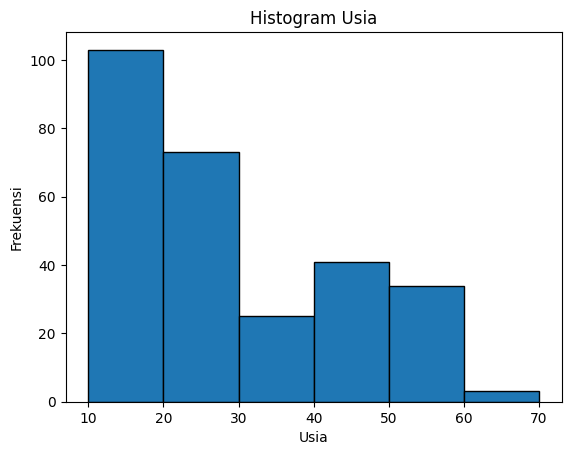

In [58]:
usia = df['Usia']

# Membuat rentang usia
bins = np.arange(10, usia.max() + 10, 10)

# Membuat histogram
plt.hist(usia, bins=bins, edgecolor='black')

plt.title('Histogram Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')

plt.show()

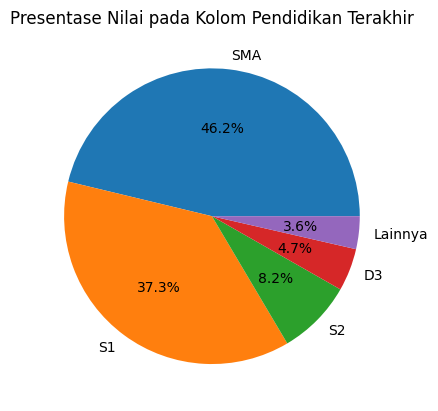

Nilai yang terkandung dalam 'Nilai Lainnya':
Lainnya


In [64]:
pendidikan_terakhir = df['Pendidikan Terakhir']

# Menghitung jumlah setiap nilai unik
counts = df['Pendidikan Terakhir'].value_counts(normalize=True) * 100

# Menggabungkan nilai dengan presentase kurang dari 4%
counts = counts[counts >= 4]
counts['Lainnya'] = 100 - counts.sum()

# Membuat pie chart
counts.plot(kind='pie', autopct='%1.1f%%')

plt.title('Presentase Nilai pada Kolom Pendidikan Terakhir')
plt.ylabel('')  # Menghapus label sumbu y

plt.show()